## Calculate one-way anove for each variable (each column) based on the "Group" column.




In [1]:
# retrive variables stored in other Jupyter notebooks

%store -r overall_loc_scores_final
%store -r overall_loc_scores

In [2]:
overall_loc_scores_final

,Student,Group,user-requirement-phase5,infovis-phase5,novelty-phase5,total-phase5,tech-phase5,tech-phase4,user-requirement-phase4,infovis-phase4,...,improve-effort-23,improve-effort-34,improve-effort-45,improve-effort-15,improve-effort-25,d3-effort-12,d3-effort-23,d3-effort-34,d3-effort-45,d3-effort-15
0,fffeelipe,0.0,20.0,29.17,50.00,199.17,100.0,100.0,20.0,29.17,...,0.0,-14.0,-6.0,-32.5,0.0,0.0,0.0,0.0,0.0,0.0
1,mnguzmanc,0.0,60.0,75.00,67.50,290.00,87.5,87.5,20.0,37.50,...,-16.5,45.5,13.0,-29.0,-21.0,0.0,0.0,0.0,0.0,0.0
2,jmcuestasb,0.0,100.0,54.17,25.00,254.17,75.0,62.5,100.0,58.33,...,1.5,9.0,-4.0,7.0,-12.0,0.0,0.0,0.0,0.0,0.0
3,katherinsb,0.0,20.0,37.50,16.67,136.67,62.5,37.5,20.0,45.83,...,0.0,0.0,73.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jjrodriguezn,0.0,60.0,58.33,87.50,255.83,50.0,37.5,40.0,54.17,...,8.0,60.5,0.5,0.0,34.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,JhonEmmanuelTorres,3.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,janoguerab,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,djsanabriac,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,anmmunozme,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

dropped_student = overall_loc_scores_final.drop('Student', axis=1)
df_long = dropped_student.melt(id_vars="Group")

df_long

,Group,variable,value
0,0.0,user-requirement-phase5,20.0
1,0.0,user-requirement-phase5,60.0
2,0.0,user-requirement-phase5,100.0
3,0.0,user-requirement-phase5,20.0
4,0.0,user-requirement-phase5,60.0
...,...,...,...
23179,3.0,d3-effort-15,0.0
23180,0.0,d3-effort-15,0.0
23181,0.0,d3-effort-15,0.0
23182,0.0,d3-effort-15,0.0


In [4]:
df_long.to_csv('long.csv')
df_long

,Group,variable,value
0,0.0,user-requirement-phase5,20.0
1,0.0,user-requirement-phase5,60.0
2,0.0,user-requirement-phase5,100.0
3,0.0,user-requirement-phase5,20.0
4,0.0,user-requirement-phase5,60.0
...,...,...,...
23179,3.0,d3-effort-15,0.0
23180,0.0,d3-effort-15,0.0
23181,0.0,d3-effort-15,0.0
23182,0.0,d3-effort-15,0.0


In [5]:
def aov_func(x):
    model = ols('value ~ Group', data=x).fit()
    return sm.stats.anova_lm(model)
        
output_df = df_long.groupby("variable").apply(aov_func)
output_df

df         sum_sq      mean_sq         F  \
variable                                                                        
Q10                     Group       1.0       0.000038     0.000038  0.000047   
                        Residual  166.0     133.851153     0.806332       NaN   
Q11                     Group       1.0      13.253679    13.253679  1.222116   
                        Residual  166.0    1800.246321    10.844857       NaN   
Q12                     Group       1.0       5.981604     5.981604  1.344644   
...                                 ...            ...          ...       ...   
user-requirement-phase3 Residual  166.0  154308.003742   929.566288       NaN   
user-requirement-phase4 Group       1.0    2291.257488  2291.257488  2.276574   
                        Residual  166.0  167070.647274  1006.449682       NaN   
user-requirement-phase5 Group       1.0    4715.607723  4715.607723  3.643977   
                        Residual  166.0  214817.725610  1294.082684       NaN   

                                    PR(>F)  
variable                                    
Q10                     Group     0.994533  
                        Residual       NaN  
Q11                     Group     0.270545  
                        Residual       NaN  
Q12                     Group     0.247882  
...                                    ...  
user-requirement-phase3 Residual       NaN  
user-requirement-phase4 Group     0.133243  
                        Residual       NaN  
user-requirement-phase5 Group     0.057998  
                        Residual       NaN  

[276 rows x 5 columns]

## List of Variables that are Significant [ Less than or Equal to 0.05 ]

In [6]:
output_df.loc[(output_df['PR(>F)'] <= 0.05)]

,,df,sum_sq,mean_sq,F,PR(>F)
variable,,,,,,
Q5_Q5_3,Group,1.0,17.640652,17.640652,9.038714,0.003054
improve-effort-25,Group,1.0,15481.845953,15481.845953,5.175937,0.024181
improve-novel-45,Group,1.0,3275.408426,3275.408426,4.394043,0.037581
improve-sum-tech,Group,1.0,5933.015589,5933.015589,6.019296,0.015184
improve-tech-15,Group,1.0,5933.015589,5933.015589,6.019296,0.015184
improve-total-45,Group,1.0,19761.013862,19761.013862,5.492159,0.020287
improve-vis-45,Group,1.0,1642.197176,1642.197176,6.374250,0.012517
infovis-phase1,Group,1.0,3862.520770,3862.520770,9.988911,0.001872
infovis-phase2,Group,1.0,1186.603991,1186.603991,4.246122,0.040900


> Interpretation - improve-tech-15 mean score highest for Bogota 3 

In [7]:
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-effort-25'].loc[overall_loc_scores_final['Group'] == 3].mean())

12.732558139534884
-5.464285714285714
-14.345238095238095
-12.695121951219512


In [8]:
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-tech-15'].loc[overall_loc_scores_final['Group'] == 3].mean())

23.546511627906977
24.404761904761905
36.607142857142854
37.19512195121951


> Interpretation - improve-novel-45 mean score highest for Bogota 3

In [9]:
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-novel-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

8.74046511627907
8.090476190476192
13.755238095238095
20.10146341463415


> Interpretation - improve-vis-45 mean score highest for Bogota 3

In [10]:
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-vis-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

3.1979069767441857
1.885
5.55547619047619
11.381951219512194


> Interpretation - improve-total-45 mean score highest for Bogota 3

In [11]:
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 0].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 1].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 2].mean())
print(overall_loc_scores_final['improve-total-45'].loc[overall_loc_scores_final['Group'] == 3].mean())

28.333720930232552
15.630476190476186
37.28666666666666
53.80097560975609


## Post-Hoc Test [ Section to be Ignored ]

In [12]:
import pingouin as pg
from pingouin import pairwise_ttests

posthocs = pairwise_ttests(dv='improve-effort-25', between='Group', padjust='bonf', data=overall_loc_scores_final, correction=True)
posthocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,0.0,1.0,False,True,1.915917,68.478099,two-sided,0.059551,0.357308,bonf,1.109,0.409527
1,Group,0.0,2.0,False,True,1.895477,73.422045,two-sided,0.061965,0.371793,bonf,1.072,0.409135
2,Group,0.0,3.0,False,True,2.283548,81.819917,two-sided,0.024991,0.149945,bonf,2.14,0.492751
3,Group,1.0,2.0,False,True,0.698940,54.760691,two-sided,0.487547,1.000000,bonf,0.282,0.151122
4,Group,1.0,3.0,False,True,0.801611,68.479345,two-sided,0.425551,1.000000,bonf,0.303,0.175219
5,Group,2.0,3.0,False,True,-0.118096,69.929950,two-sided,0.906330,1.000000,bonf,0.23,-0.025555


In [13]:
pg.pairwise_gameshowell(data=overall_loc_scores_final, dv='improve-effort-25', between='Group')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0.0,1.0,12.732558,-5.464286,18.196844,9.497721,1.915917,68.478099,0.231150,0.411882
1,0.0,2.0,12.732558,-14.345238,27.077796,14.285479,1.895477,73.422045,0.238932,0.407488
2,0.0,3.0,12.732558,-12.695122,25.427680,11.135162,2.283548,81.819917,0.110448,0.493879
3,1.0,2.0,-5.464286,-14.345238,8.880952,12.706310,0.698940,54.760691,0.892691,0.151122
4,1.0,3.0,-5.464286,-12.695122,7.230836,9.020379,0.801611,68.479345,0.835387,0.174355
5,2.0,3.0,-14.345238,-12.695122,-1.650116,13.972668,-0.118096,69.929950,0.900000,-0.025687


In [14]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-effort-25'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

group1,group2,stat,pval,pval_corr,reject
0.0,1.0,1.905,0.0602,0.3615,False
0.0,2.0,1.9031,0.0605,0.3629,False
0.0,3.0,2.2783,0.0253,0.1518,False
1.0,2.0,0.6989,0.4866,1.0,False
1.0,3.0,0.8056,0.4228,1.0,False
2.0,3.0,-0.1175,0.9068,1.0,False


In [15]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-tech-15'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

group1,group2,stat,pval,pval_corr,reject
0.0,1.0,-0.1191,0.9055,1.0,False
0.0,2.0,-1.8723,0.0647,0.3881,False
0.0,3.0,-1.8722,0.0647,0.3885,False
1.0,2.0,-1.8997,0.061,0.3659,False
1.0,3.0,-1.8932,0.0619,0.3714,False
2.0,3.0,-0.0905,0.9281,1.0,False


In [16]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-novel-45'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

group1,group2,stat,pval,pval_corr,reject
0.0,1.0,0.1278,0.8986,1.0,False
0.0,2.0,-0.8544,0.3953,1.0,False
0.0,3.0,-1.8081,0.0743,0.4456,False
1.0,2.0,-1.0005,0.32,1.0,False
1.0,3.0,-1.9709,0.0522,0.3129,False
2.0,3.0,-0.9341,0.353,1.0,False


In [17]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-vis-45'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

group1,group2,stat,pval,pval_corr,reject
0.0,1.0,0.4139,0.68,1.0,False
0.0,2.0,-0.7016,0.4849,1.0,False
0.0,3.0,-2.3236,0.0226,0.1357,False
1.0,2.0,-1.0545,0.2948,1.0,False
1.0,3.0,-2.6071,0.0109,0.0652,False
2.0,3.0,-1.5269,0.1307,0.784,False


In [18]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(overall_loc_scores_final['improve-total-15'], overall_loc_scores_final['Group'])

tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method='bonferroni')
tb1

group1,group2,stat,pval,pval_corr,reject
0.0,1.0,0.7237,0.4713,1.0,False
0.0,2.0,-0.1532,0.8786,1.0,False
0.0,3.0,-1.0782,0.2841,1.0,False
1.0,2.0,-1.0049,0.3179,1.0,False
1.0,3.0,-2.0945,0.0393,0.236,False
2.0,3.0,-1.054,0.295,1.0,False


In [19]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-effort-25'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0 -18.1968 0.4229  -49.053 12.6593  False
   0.0    2.0 -27.0778 0.1075 -57.9339  3.7783  False
   0.0    3.0 -25.4277 0.1492 -56.4736  5.6182  False
   1.0    2.0   -8.881 0.8685  -39.918 22.1561  False
   1.0    3.0  -7.2308    0.9 -38.4566 23.9949  False
   2.0    3.0   1.6501    0.9 -29.5756 32.8759  False
-----------------------------------------------------


In [20]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-novel-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0    -0.65    0.9 -16.0818 14.7818  False
   0.0    2.0   5.0148 0.8121  -10.417 20.4466  False
   0.0    3.0   11.361 0.2325  -4.1657 26.8877  False
   1.0    2.0   5.6648 0.7541  -9.8576 21.1871  False
   1.0    3.0   12.011 0.1936  -3.6057 27.6277  False
   2.0    3.0   6.3462 0.6939  -9.2705 21.9629  False
-----------------------------------------------------


In [21]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['Q5_Q5_3'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.7929 0.0458  0.0103 1.5756   True
   0.0    2.0    0.912 0.0152  0.1293 1.6946   True
   0.0    3.0   0.9172 0.0152  0.1297 1.7047   True
   1.0    2.0    0.119    0.9 -0.6682 0.9063  False
   1.0    3.0   0.1243    0.9 -0.6678 0.9163  False
   2.0    3.0   0.0052    0.9 -0.7868 0.7973  False
---------------------------------------------------


In [22]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-tech-15'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0   0.8583    0.9 -16.8686 18.5851  False
   0.0    2.0  13.0606  0.227  -4.6662 30.7875  False
   0.0    3.0  13.6486 0.1974  -4.1873 31.4845  False
   1.0    2.0  12.2024 0.2886  -5.6284 30.0332  False
   1.0    3.0  12.7904 0.2537  -5.1488 30.7296  False
   2.0    3.0    0.588    0.9 -17.3512 18.5272  False
-----------------------------------------------------


In [23]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-vis-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0  -1.3129    0.9 -10.3476  7.7218  False
   0.0    2.0   2.3576    0.9  -6.6771 11.3923  False
   0.0    3.0    8.184 0.0939  -0.9062 17.2743  False
   1.0    2.0   3.6705 0.6975  -5.4172 12.7582  False
   1.0    3.0    9.497 0.0384    0.354 18.6399   True
   2.0    3.0   5.8265 0.3519  -3.3165 14.9694  False
-----------------------------------------------------


In [24]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=overall_loc_scores_final['improve-total-45'],
                          groups=overall_loc_scores_final['Group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0 -12.7032 0.7356 -46.3356 20.9291  False
   0.0    2.0   8.9529 0.8975 -24.6794 42.5853  False
   0.0    3.0  25.4673 0.2102  -8.3719 59.3065  False
   1.0    2.0  21.6562 0.3478 -12.1734 55.4858  False
   1.0    3.0  38.1705 0.0212   4.1352 72.2058   True
   2.0    3.0  16.5143 0.5795  -17.521 50.5496  False
-----------------------------------------------------


In [25]:
output_df.to_csv('output.csv')

### Cronbach’s Alpha ( Internal Consistency )

0.9 ≤ α	Excellent

0.8 ≤ α < 0.9	Good

0.7 ≤ α < 0.8	Acceptable

0.6 ≤ α < 0.7	Questionable

0.5 ≤ α < 0.6	Poor

α < 0.5	Unacceptable

In [26]:
# 95% confidence interval for Cronbach's alpha

import pingouin as pg

dropped_student_group = overall_loc_scores_final.drop(['Student', 'Group'], axis=1)

pg.cronbach_alpha(data=dropped_student_group)



(0.9095718695451313, array([0.889, 0.928]))

## Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:


* Bartlett’s Test
* Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [27]:
# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dropped_student_group)
p_value

/usr/local/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [28]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dropped_student_group)
kmo_model

/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.2486760515069066

## Factor Analysis Phase 1 - 5 [ All Groups ] 

In [30]:
df_phase15 = dropped_student_group[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15',
                                   ]]
df_phase15

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,50.00,0.00,0.0,50.0,100.00
1,67.50,75.00,60.0,0.0,202.50
2,25.00,54.17,100.0,25.0,204.17
3,16.67,37.50,20.0,62.5,136.67
4,87.50,58.33,60.0,50.0,255.83
...,...,...,...,...,...
163,0.00,0.00,0.0,0.0,0.00
164,0.00,0.00,0.0,0.0,0.00
165,0.00,0.00,0.0,0.0,0.00
166,0.00,0.00,0.0,0.0,0.00


> Variance differs a lot between the score variables, so we standardize them to values between 0 and 1 before performing PCA.

In [31]:
print(df_phase15.var()['improve-novel-15'])
print(df_phase15.var()['improve-vis-15'])
print(df_phase15.var()['improve-ur-15'])
print(df_phase15.var()['improve-tech-15'])
print(df_phase15.var()['improve-total-15'])


1364.6183715675795
422.36187634730516
1090.6187624750487
1015.2908468776735
8650.80235328985


In [32]:
df_new = (df_phase15-df_phase15.mean())/df_phase15.std()
df_new.describe()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
count,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02
mean,-3.039896e-17,5.405729e-16,8.326673e-17,2.246880e-17,2.722690e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.680253e+00,-2.018958e+00,-2.523378e+00,-2.914205e+00,-2.600132e+00
25%,-6.499744e-01,-8.024983e-01,-7.065458e-01,-9.527208e-01,-9.325366e-01
50%,-3.115946e-01,-1.942686e-01,-7.065458e-01,-1.681272e-01,2.507867e-02
75%,9.742486e-01,6.168666e-01,5.046756e-01,6.164664e-01,8.067983e-01
max,2.226254e+00,2.846880e+00,2.321508e+00,2.185654e+00,2.479984e+00


In [33]:
# Here, we can see only for 1 eigenvalues are greater than one. 
# It means we need to choose only 1 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.32968338e+00, 8.45022749e-01, 5.97716961e-01, 2.26155351e-01,
       1.42155741e-03])

In [34]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

In [35]:
# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(dropped_student_group)

/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [36]:
# Get the loadings

loadings = fa.loadings_

In [37]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [38]:
# Do a scree plot 

xvals = range(1, dropped_student_group.shape[1] + 1)

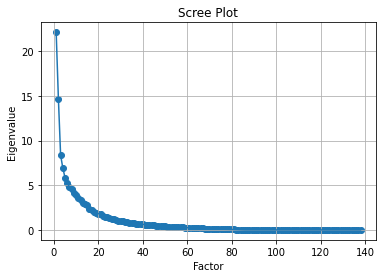

In [39]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [40]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

,0
0,-0.838809
1,-0.873655
2,-0.863882
3,-0.961430
4,-0.804307
...,...
133,-0.124849
134,-0.185366
135,-0.190920
136,0.008334


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new)

PCA(n_components=1, svd_solver='full')

In [42]:
T = pca.transform(df_new)

In [43]:
df_new.shape

(168, 5)

In [44]:
T.shape

(168, 1)

In [45]:
df_new.head()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.703545,-0.802498,-0.706546,0.616466,0.060881
1,1.177276,2.846880,1.110286,-0.952721,1.162917
2,0.026785,1.833326,2.321508,-0.168127,1.180872
3,-0.198711,1.022191,-0.100935,1.008763,0.455141
4,1.718684,2.035745,1.110286,0.616466,1.736298


In [46]:
T

array([[-0.14007002],
       [ 2.55749136],
       [ 2.47989595],
       [ 0.91802069],
       [ 3.28550702],
       [ 1.77801143],
       [-3.63178739],
       [ 2.05880765],
       [ 4.56535261],
       [ 1.05024645],
       [ 0.22515951],
       [ 1.62793668],
       [ 3.83972317],
       [-0.62217973],
       [-2.89719634],
       [-0.15194248],
       [-1.70509082],
       [-0.30750696],
       [ 0.28806824],
       [-1.93202182],
       [ 0.46486335],
       [-1.39900885],
       [-4.51725239],
       [ 1.27450769],
       [ 1.82840479],
       [ 1.8335809 ],
       [-0.13577462],
       [ 1.02327788],
       [ 0.4058792 ],
       [ 3.81273197],
       [ 2.64338121],
       [ 1.19503766],
       [-1.83544148],
       [-2.88431015],
       [-1.83544148],
       [-1.83544148],
       [-2.04521522],
       [-1.83544148],
       [-2.51569027],
       [-1.73878676],
       [-1.41589401],
       [ 1.66518885],
       [-2.25498895],
       [ 0.3010045 ],
       [-1.604858  ],
       [-1

In [47]:
pca.explained_variance_ratio_

# So just 1 principle component can explain almost 67% of the variance from these 5 features.

array([0.66593668])

In [48]:
components = pd.DataFrame(pca.components_, columns = df_new.columns, index=[0])
components

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.41609,0.438735,0.464822,0.347953,0.545206


In [49]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new.columns.values)

Features by importance:
 [(2.489059877096832, 'improve-total-15'), (2.1220768856190024, 'improve-ur-15'), (2.0029792676941747, 'improve-vis-15'), (1.899595940790289, 'improve-novel-15'), (1.588528997324677, 'improve-tech-15')]


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

>> We can see from the plot that all components are positive in the first principle component. 

>> improve-ur-15, improve-novel-15, improve-total-15, improve-vis-15 are negative in the second principle component. Their lengths portray their magnitudes.

>> The participants in green have high values for the first principle component – They have high improve-ur-15, improve-novel-15, improve-total-15, improve-vis-15 and change-files-15

>> The participants in red have high values for the second principle component – They have high delete-loc-15 and add-loc-15

In [51]:
# Get variance of each factors

# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

## 
fa.get_factor_variance()



(array([21.57499399]), array([0.15634054]), array([0.15634054]))

## Factor Analysis - Group 0 

In [52]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_0 = dropped_student[dropped_student['Group'].isin([0])]

df_phase15_bogota0 = bogota_0[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota0.head(5)

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,50.00,0.00,0.0,50.0,100.00
1,67.50,75.00,60.0,0.0,202.50
2,25.00,54.17,100.0,25.0,204.17
3,16.67,37.50,20.0,62.5,136.67
4,87.50,58.33,60.0,50.0,255.83


In [53]:
print(df_phase15_bogota0.var()['improve-novel-15'])
print(df_phase15_bogota0.var()['improve-vis-15'])
print(df_phase15_bogota0.var()['improve-ur-15'])
print(df_phase15_bogota0.var()['improve-tech-15'])
print(df_phase15_bogota0.var()['improve-total-15'])


1540.2011684385377
574.3466596899225
1272.6467331118495
1266.438261351052
12334.284161129566


In [54]:
df_new_bogota0 = (df_phase15_bogota0-df_phase15_bogota0.mean())/df_phase15_bogota0.std()
df_new_bogota0.describe()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
count,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,-5.163828e-18,-6.196594e-17,-5.163828e-18,-2.065531e-17,-1.394234e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.607825e+00,-1.855873e+00,-2.294670e+00,-2.417916e+00,-2.153323e+00
25%,-6.967726e-01,-8.127079e-01,-6.127812e-01,-6.616595e-01,-8.252100e-01
50%,-5.975519e-02,-2.911255e-01,-6.127812e-01,4.084318e-02,7.520565e-02
75%,8.957709e-01,4.912482e-01,5.084781e-01,7.433459e-01,7.655093e-01
max,2.010551e+00,2.316787e+00,2.190367e+00,2.148351e+00,2.101141e+00


In [55]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota0)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.75625998e+00, 6.43760107e-01, 3.72200814e-01, 2.26998668e-01,
       7.80432854e-04])

In [56]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

In [57]:
# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota0)

/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [58]:
# Get the loadings

loadings = fa.loadings_


In [59]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [60]:
# Do a scree plot 

xvals_bogota0 = range(1, df_new_bogota0.shape[1] + 1)

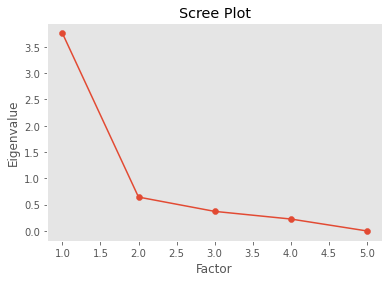

In [61]:
plt.scatter(xvals_bogota0, ev)
plt.plot(xvals_bogota0, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [62]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

,0
0,-0.809454
1,-0.779809
2,-0.819019
3,-0.686683
4,-1.034835


In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota0)

PCA(n_components=1, svd_solver='full')

In [64]:
T = pca.transform(df_new_bogota0)

In [65]:
df_new_bogota0.shape

(43, 5)

In [66]:
T.shape

(43, 1)

In [67]:
df_new_bogota0.head()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.577262,-0.812708,-0.612781,0.743346,0.075206
1,1.023174,2.316787,1.069108,-0.661660,0.998132
2,-0.059755,1.447622,2.190367,0.040843,1.013169
3,-0.272009,0.752039,-0.052152,1.094597,0.405388
4,1.532788,1.621204,1.069108,0.743346,1.478323


In [68]:
T

array([[-0.03562361],
       [ 2.17902623],
       [ 2.1097349 ],
       [ 0.8221344 ],
       [ 2.90643787],
       [ 1.65903127],
       [-3.24501926],
       [ 1.8527173 ],
       [ 4.04633453],
       [ 0.9734224 ],
       [ 0.30058762],
       [ 1.49384947],
       [ 3.35385428],
       [-0.56345053],
       [-2.60636144],
       [-0.15651192],
       [-1.53084888],
       [-0.26054764],
       [ 0.36165075],
       [-1.71959182],
       [ 0.37018318],
       [-1.23179449],
       [-4.02779247],
       [ 1.19101874],
       [ 1.65665071],
       [ 1.563255  ],
       [-0.03369936],
       [ 0.92719695],
       [ 0.36871523],
       [ 3.34173769],
       [ 2.36809837],
       [ 1.09892284],
       [-1.61702405],
       [-2.60058869],
       [-1.61702405],
       [-1.61702405],
       [-1.81373698],
       [-1.61702405],
       [-2.18280024],
       [-1.61702405],
       [-1.61702405],
       [-1.61702405],
       [-1.61702405]])

In [69]:
pca.explained_variance_ratio_

# So just 1 principle components can explain almost 75% of the variance from these 9 features.

array([0.751252])

In [70]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota0.columns, index=[0])
components

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.441623,0.43121,0.444615,0.394978,0.515109


In [71]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
   

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota0.columns.values)

Features by importance:
 [(2.08430410164552, 'improve-total-15'), (1.7990621010347951, 'improve-ur-15'), (1.7869527451692138, 'improve-novel-15'), (1.7448198106377364, 'improve-vis-15'), (1.5982111230208256, 'improve-tech-15')]


## Factor Analysis - Group 1

In [72]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_1 = dropped_student[dropped_student['Group'].isin([1])]

df_phase15_bogota1 = bogota_1[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15',]]
df_phase15_bogota1.head(5)

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
39,-37.5,12.50,20.0,0.0,-5.00
40,0.0,0.00,0.0,25.0,25.00
41,62.5,29.17,40.0,50.0,181.67
42,0.0,0.00,0.0,-25.0,-25.00
43,25.0,25.00,20.0,37.5,107.50


In [73]:
print(df_phase15_bogota1.var()['improve-novel-15'])
print(df_phase15_bogota1.var()['improve-vis-15'])
print(df_phase15_bogota1.var()['improve-ur-15'])
print(df_phase15_bogota1.var()['improve-tech-15'])
print(df_phase15_bogota1.var()['improve-total-15'])


1208.9732839140538
335.24920238095245
916.1440185830431
937.1370499419284
6934.4580973286875


In [74]:
df_new_bogota1 = (df_phase15_bogota1-df_phase15_bogota1.mean())/df_phase15_bogota1.std()
df_new_bogota1.describe()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
count,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,-5.815454e-17,6.872809e-17,-2.114711e-17,-6.344132e-17,-9.251859e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.649718e+00,-2.069759e+00,-1.290068e+00,-2.022193e+00,-1.465660e+00
25%,-5.712115e-01,-7.043712e-01,-6.293016e-01,-7.972105e-01,-7.725514e-01
50%,-3.555101e-01,-2.494239e-01,-6.293016e-01,1.944416e-02,-1.196117e-01
75%,9.117355e-01,8.887637e-01,5.270401e-01,8.360988e-01,5.158553e-01
max,1.945305e+00,2.026405e+00,2.674532e+00,2.061081e+00,2.837515e+00


In [75]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota1)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.18904534e+00, 9.42738847e-01, 6.77302286e-01, 1.90913529e-01,
       7.18270864e-17])

In [76]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota1)

/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [77]:
# Get the loadings

loadings = fa.loadings_

In [78]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [79]:
# Do a scree plot 

xvals_bogota1 = range(1, df_new_bogota1.shape[1] + 1)

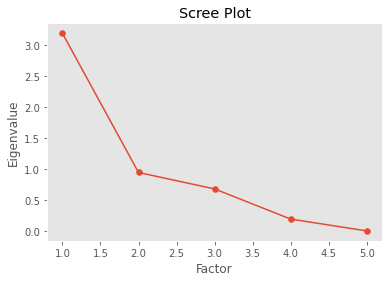

In [80]:
plt.scatter(xvals_bogota1, ev)
plt.plot(xvals_bogota1, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [81]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

,0
0,-0.591045
1,-0.753675
2,-0.791361
3,-0.478125
4,-1.040552


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota0)

PCA(n_components=1, svd_solver='full')

In [83]:
T = pca.transform(df_new_bogota0)

In [84]:
df_new_bogota1.shape

(42, 5)

In [85]:
T.shape

(43, 1)

In [86]:
df_new_bogota1.head()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
39,-1.649718,-0.021677,0.031465,-0.797211,-0.975227
40,-0.571211,-0.704371,-0.629302,0.019444,-0.614968
41,1.226300,0.888764,0.692232,0.836099,1.266425
42,-0.571211,-0.704371,-0.629302,-1.613865,-1.215400
43,0.147793,0.661017,0.031465,0.427771,0.375745


In [87]:
T

array([[-0.03562361],
       [ 2.17902623],
       [ 2.1097349 ],
       [ 0.8221344 ],
       [ 2.90643787],
       [ 1.65903127],
       [-3.24501926],
       [ 1.8527173 ],
       [ 4.04633453],
       [ 0.9734224 ],
       [ 0.30058762],
       [ 1.49384947],
       [ 3.35385428],
       [-0.56345053],
       [-2.60636144],
       [-0.15651192],
       [-1.53084888],
       [-0.26054764],
       [ 0.36165075],
       [-1.71959182],
       [ 0.37018318],
       [-1.23179449],
       [-4.02779247],
       [ 1.19101874],
       [ 1.65665071],
       [ 1.563255  ],
       [-0.03369936],
       [ 0.92719695],
       [ 0.36871523],
       [ 3.34173769],
       [ 2.36809837],
       [ 1.09892284],
       [-1.61702405],
       [-2.60058869],
       [-1.61702405],
       [-1.61702405],
       [-1.81373698],
       [-1.61702405],
       [-2.18280024],
       [-1.61702405],
       [-1.61702405],
       [-1.61702405],
       [-1.61702405]])

In [88]:
pca.explained_variance_ratio_

array([0.751252])

In [89]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota1.columns, index=[0])
components

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.441623,0.43121,0.444615,0.394978,0.515109


In [90]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota1.columns.values)

Features by importance:
 [(2.08430410164552, 'improve-total-15'), (1.7990621010347951, 'improve-ur-15'), (1.7869527451692138, 'improve-novel-15'), (1.7448198106377364, 'improve-vis-15'), (1.5982111230208256, 'improve-tech-15')]


## Factor Analysis - Group 2

In [91]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_2 = dropped_student[dropped_student['Group'].isin([2])]

df_phase15_bogota2 = bogota_2[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota2.head(5)

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
81,0.0,-12.50,0.0,50.0,37.50
82,0.0,25.00,20.0,62.5,107.50
83,0.0,-4.17,-20.0,25.0,0.83
84,25.0,50.00,40.0,37.5,152.50
85,80.0,66.67,80.0,87.5,314.17


In [92]:
print(df_phase15_bogota2.var()['improve-novel-15'])
print(df_phase15_bogota2.var()['improve-vis-15'])
print(df_phase15_bogota2.var()['improve-ur-15'])
print(df_phase15_bogota2.var()['improve-tech-15'])
print(df_phase15_bogota2.var()['improve-total-15'])


1546.8949083042974
376.49666968641105
915.4471544715453
795.6772648083621
7718.226965621369


In [93]:
df_new_bogota2 = (df_phase15_bogota2-df_phase15_bogota2.mean())/df_phase15_bogota2.std()
df_new_bogota2.describe()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
count,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,-3.436405e-17,2.854859e-16,5.286776e-17,1.374562e-16,-5.286776e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.049181e+00,-1.672009e+00,-1.432206e+00,-1.740909e+00,-1.507961e+00
25%,-4.600866e-01,-8.128863e-01,-7.711878e-01,-8.546283e-01,-8.676897e-01
50%,-4.600866e-01,-1.686734e-01,-4.406787e-01,3.165290e-02,-5.195612e-02
75%,9.700981e-01,6.363351e-01,5.508484e-01,4.747935e-01,7.685297e-01
max,2.082464e+00,2.623088e+00,1.872885e+00,2.247356e+00,2.494956e+00


In [94]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota2)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.23182861, 0.86182385, 0.70777788, 0.1940494 , 0.00452026])

In [95]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

# create a factor analyzer variable and perform factor analysis 

fa = FactorAnalyzer(n_factors=1, rotation="varimax")
fa.fit(df_new_bogota2)

/usr/local/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [96]:
# Get the loadings

loadings = fa.loadings_


In [97]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [98]:
# Do a scree plot 

xvals_bogota2 = range(1, df_new_bogota2.shape[1] + 1)

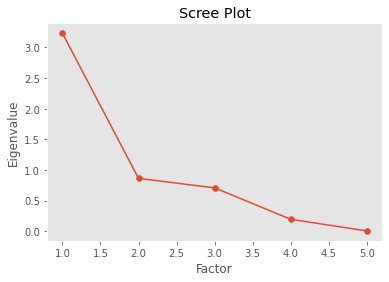

In [99]:
plt.scatter(xvals_bogota2, ev)
plt.plot(xvals_bogota2, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [100]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

,0
0,-0.670097
1,-0.716866
2,-0.800868
3,-0.463859
4,-1.039288


In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full')
pca.fit(df_new_bogota2)

PCA(n_components=1, svd_solver='full')

In [102]:
T = pca.transform(df_new_bogota2)

In [103]:
df_new_bogota2.shape

(42, 5)

In [104]:
T.shape

(42, 1)

In [105]:
df_new_bogota2.head()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
81,-0.460087,-1.457099,-0.771188,0.474793,-0.654266
82,-0.460087,0.475540,-0.110170,0.917934,0.142515
83,-0.460087,-1.027796,-1.432206,-0.411488,-1.071666
84,0.175551,1.763965,0.550848,0.031653,0.654732
85,1.573954,2.623088,1.872885,1.804215,2.494956


In [106]:
T

array([[-1.41114197],
       [ 0.33600571],
       [-2.04552663],
       [ 1.48493944],
       [ 4.65497271],
       [ 2.47303364],
       [-0.01402733],
       [-1.0251432 ],
       [-1.28259167],
       [-1.92592462],
       [ 0.47179631],
       [-2.70545317],
       [ 3.60525734],
       [-0.04909512],
       [ 1.8252431 ],
       [-0.20139359],
       [ 1.67515533],
       [ 0.59008477],
       [ 3.02122309],
       [-1.26730104],
       [ 1.39710734],
       [-0.02085305],
       [ 2.68492951],
       [ 1.66499397],
       [-2.56161224],
       [-0.91156424],
       [-1.68344748],
       [ 0.11646452],
       [ 1.24399884],
       [-2.30416377],
       [-0.10469893],
       [-0.61029973],
       [ 0.77529124],
       [ 1.8711432 ],
       [-1.63821417],
       [-0.14222325],
       [-0.82057334],
       [ 0.53730696],
       [-1.92592462],
       [-1.92592462],
       [-1.92592462],
       [-1.92592462]])

In [107]:
pca.explained_variance_ratio_

# So just 3 principle components can explain almost 73% of the variance from these 9 features.

array([0.64636572])

In [108]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota2.columns, index=[0])
components

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.420199,0.442452,0.472154,0.318618,0.550657


In [109]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])


    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota0.columns.values)

Features by importance:
 [(2.5632933530238637, 'improve-total-15'), (2.1978617547049932, 'improve-ur-15'), (2.059602024808761, 'improve-vis-15'), (1.9560136264536776, 'improve-novel-15'), (1.4831560871467937, 'improve-tech-15')]


## Factor Analysis - Group 3

In [110]:
dropped_student = overall_loc_scores_final.drop(['Student'], axis=1)

bogota_3 = dropped_student[dropped_student['Group'].isin([3])]

df_phase15_bogota3 = bogota_3[['improve-novel-15', 'improve-vis-15', 'improve-ur-15', 'improve-tech-15', 'improve-total-15']]
df_phase15_bogota3.head(5)

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
123,87.50,20.84,100.0,62.5,270.84
124,30.00,45.83,80.0,37.5,193.33
125,-10.00,8.33,0.0,25.0,23.33
126,56.25,12.50,40.0,75.0,183.75
127,25.00,25.00,0.0,62.5,112.50


In [111]:
print(df_phase15_bogota3.var()['improve-novel-15'])
print(df_phase15_bogota3.var()['improve-vis-15'])
print(df_phase15_bogota3.var()['improve-ur-15'])
print(df_phase15_bogota3.var()['improve-tech-15'])
print(df_phase15_bogota3.var()['improve-total-15'])

1140.964652195122
405.3568562195122
1281.9512195121956
956.9359756097562
7353.2981174390225


In [112]:
df_new_bogota3 = (df_phase15_bogota3-df_phase15_bogota3.mean())/df_phase15_bogota3.std()
df_new_bogota3.describe()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,-5.957294e-17,3.791005e-17,-1.083144e-17,2.707861e-17,4.115949e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.899250e+00,-2.124965e+00,-1.934634e+00,-2.818712e+00,-1.924981e+00
25%,-9.125175e-01,-8.832517e-01,-8.174508e-01,-3.942255e-01,-7.588188e-01
50%,-1.723945e-01,-5.577412e-02,-2.588594e-01,9.855637e-03,-3.976328e-02
75%,7.527593e-01,5.655791e-01,8.583234e-01,8.180179e-01,8.009230e-01
max,1.899950e+00,2.013913e+00,1.975506e+00,1.626180e+00,2.205099e+00


In [113]:
# Here, we can see only for 18-factors eigenvalues are greater than one. 
# It means we need to choose only 18 factors (or unobserved variables).

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_new_bogota3)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([3.02989505e+00, 1.05647069e+00, 6.92717468e-01, 2.20916795e-01,
       1.92560268e-10])

In [114]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df_new_bogota3)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [115]:
# Get the loadings

loadings = fa.loadings_

In [116]:
# Get the Eigenvector and Eigenvalues

ev, v = fa.get_eigenvalues()

In [117]:
# Do a scree plot 

xvals_bogota3 = range(1, df_new_bogota3.shape[1] + 1)

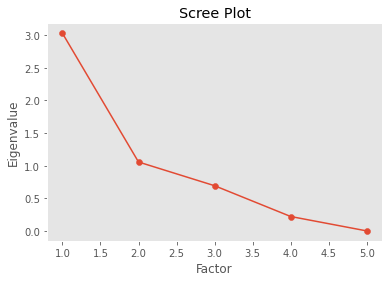

In [118]:
plt.scatter(xvals_bogota3, ev)
plt.plot(xvals_bogota3, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [119]:
df_pca = pd.DataFrame.from_records(loadings)
df_pca

,0,1
0,0.226852,0.641636
1,0.783663,0.153642
2,0.904232,0.267863
3,0.066480,0.584799
4,0.641308,0.827475


In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df_new_bogota3)

PCA(n_components=2, svd_solver='full')

In [121]:
T = pca.transform(df_new_bogota3)

In [122]:
df_new_bogota3.shape

(41, 5)

In [123]:
T.shape

(41, 2)

In [124]:
df_new_bogota3.head()

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
123,1.677913,0.151840,1.975506,0.818018,1.816534
124,-0.024370,1.393057,1.416915,0.009856,0.912641
125,-1.208567,-0.469513,-0.817451,-0.394225,-1.069834
126,0.752759,-0.262395,0.299732,1.222099,0.800923
127,-0.172395,0.358461,-0.817451,0.818018,-0.029968


In [125]:
T

array([[ 2.98105636, -0.52810213],
       [ 1.80885906,  1.17391398],
       [-1.81039905,  0.28143911],
       [ 1.16001935, -1.18888712],
       [-0.08182638, -0.59672753],
       [ 3.70885367, -0.87001728],
       [-0.10603021,  0.39654507],
       [-2.64600429, -1.02320183],
       [-0.4797817 ,  0.24379755],
       [-1.581038  , -2.01412692],
       [-1.40817594,  0.38074601],
       [-0.70058428,  0.23597959],
       [ 1.86350489, -0.09241829],
       [ 1.16059627,  1.16876   ],
       [ 1.76313375, -0.92945689],
       [-0.64815739, -1.34442431],
       [ 0.94441953, -1.51639993],
       [ 1.25868634,  1.5583043 ],
       [ 0.66138406,  0.54973475],
       [-0.18445754, -0.67899526],
       [ 1.69330077, -0.03733268],
       [-0.65382729, -1.42523922],
       [ 1.66717236,  0.59702492],
       [-1.72079639,  2.57239649],
       [-2.76887325, -0.37487191],
       [ 1.40643185, -0.48250402],
       [ 2.08157005,  0.93425077],
       [-2.21066973,  1.05931274],
       [-0.09373321,

In [126]:
pca.explained_variance_ratio_

array([0.60597901, 0.21129414])

In [127]:
components = pd.DataFrame(pca.components_, columns = df_new_bogota3.columns, index=[0, 1])
components

,improve-novel-15,improve-vis-15,improve-ur-15,improve-tech-15,improve-total-15
0,0.394564,0.431121,0.489682,0.304461,0.570938
1,-0.391454,0.511369,0.391130,-0.649049,-0.104963


In [128]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df_new_bogota3.columns.values)

Features by importance:
 [(2.1346704841402135, 'improve-total-15'), (2.0762341692477735, 'improve-ur-15'), (2.0705255817148083, 'improve-vis-15'), (2.0156136016215243, 'improve-tech-15'), (1.7763666421969526, 'improve-novel-15')]


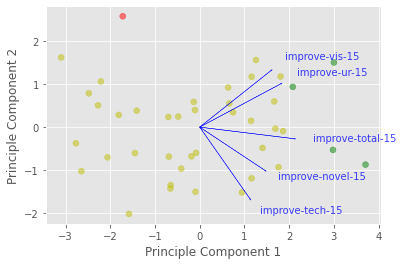

In [129]:
ax = draw_vectors(T, pca.components_, df_new_bogota3.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 2 , 'color'] = 'g'
T_df.loc[T_df['component2'] > 2, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

## ANOVA with Pingouin Package [ Section to be Ignored ]

In [130]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-novel-15', between=['Group', 'add-loc-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

               Source             SS     DF           MS             F  \
0               Group      -0.000005    3.0    -0.000002 -1.386755e-09   
1          add-loc-15   92069.560381   55.0  1673.992007  1.278830e+00   
2  Group * add-loc-15  219519.146378  165.0  1330.419069  1.016361e+00   
3            Residual  102102.208319   78.0  1309.002671           NaN   

      p-unc           np2  
0  1.000000 -5.333673e-11  
1  0.177521  4.741655e-01  
2  0.472443  6.825391e-01  
3       NaN           NaN  


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 55, but rank is 39
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 165, but rank is 88
  warnings.warn('covariance of constraints does not have full '


In [131]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-tech-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

                      Source             SS     DF           MS         F  \
0                      Group     191.725564    3.0    63.908521  0.062603   
1          improve-effort-15   -2814.786378   84.0   -33.509362 -0.032825   
2  Group * improve-effort-15  363984.852475  252.0  1444.384335  1.414887   
3                   Residual   62271.701389   61.0  1020.847564       NaN   

      p-unc       np2  
0  0.979338  0.003069  
1  1.000000 -0.047342  
2  0.070083  0.853910  
3       NaN       NaN  


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 52
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 106
  warnings.warn('covariance of constraints does not have full '


In [132]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-novel-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

                      Source             SS     DF           MS         F  \
0                      Group     956.994958    3.0   318.998319  0.272820   
1          improve-effort-15   -1220.226617   84.0   -14.526507 -0.012424   
2  Group * improve-effort-15  447805.672102  252.0  1777.006635  1.519764   
3                   Residual   71325.155422   61.0  1169.264843       NaN   

      p-unc       np2  
0  0.844767  0.013240  
1  1.000000 -0.017406  
2  0.037874  0.862607  
3       NaN       NaN  


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 51
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 106
  warnings.warn('covariance of constraints does not have full '


In [133]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-vis-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

                      Source             SS     DF           MS          F  \
0                      Group    9644.057209    3.0  3214.685736  11.807894   
1          improve-effort-15     653.741783   84.0     7.782640   0.028586   
2  Group * improve-effort-15  159191.377692  252.0   631.711816   2.320347   
3                   Residual   16607.180985   61.0   272.248869        NaN   

      p-unc       np2  
0  0.000003  0.367375  
1  1.000000  0.037874  
2  0.000237  0.905533  
3       NaN       NaN  


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 52
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 106
  warnings.warn('covariance of constraints does not have full '


In [134]:
from pingouin import ancova, read_dataset
ancova(data=overall_loc_scores_final, dv='improve-novel-15', covar=['add-loc-15', 'improve-effort-15', 'delete-loc-15'], between='Group')


,Source,SS,DF,F,p-unc,np2
0,Group,5081.108548,3,1.265271,0.288154,0.022895
1,add-loc-15,1127.880020,1,0.842576,0.360026,0.005174
2,improve-effort-15,2383.505869,1,1.780585,0.183950,0.010872
3,delete-loc-15,2232.173263,1,1.667533,0.198429,0.010189
4,Residual,216854.580388,162,NaN,NaN,NaN


In [135]:
import pandas as pd
import pingouin as pg


aov = pg.anova(dv='improve-ur-15', between=['Group', 'improve-effort-15'], data=overall_loc_scores_final,
             detailed=True)

print(aov)

                      Source             SS     DF           MS         F  \
0                      Group   13212.877889    3.0  4404.292630  7.292007   
1          improve-effort-15    8758.497058   84.0   104.267822  0.172632   
2  Group * improve-effort-15  412798.248056  252.0  1638.088286  2.712116   
3                   Residual   36843.333333   61.0   603.989071       NaN   

      p-unc       np2  
0  0.001447  0.263961  
1  1.000000  0.192065  
2  0.000021  0.918061  
3       NaN       NaN  


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 51
  warnings.warn('covariance of constraints does not have full '
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 106
  warnings.warn('covariance of constraints does not have full '
